<br>

<br>

<hr>

<br>

<hr>
<hr>

<br>

<hr>

<br>

<h3> Today's objectives: </h3>

<h3> 1. Train a Deep Convolutional Generative Adversarial Network (DCGAN) </h3> 

<h3> 2. Train a Conditional DCGAN </h3> 

<br>

<hr>

<br>

<h2> Deep Convolutional Generative Adversarial Network (DCGAN) </h2>

<h3> <u>Generator:</u> </h3>

<img src="gan-gen.drawio.png"></img> 

<br>

<h3> <u>Discriminator:</u> </h3>

<img src="gan-disc.drawio.png"></img>


Paper References:

1. Goodfellow I. J., Pouget-Abadie J., Mirza M., Xu B., Warde-Farley D., Ozair S., Courville A., Bengio Y., <b>Generative Adversarial Networks</b>, <i>https://arxiv.org/abs/1406.2661</i>.

2. Radford A., Metz L., Chintala S., <b>Unsupervised Representation Learning with Deep Convolutional Generative Adversarial Networks</b>, <i>https://arxiv.org/abs/1511.06434</i>.



In [5]:
import torch
import torch.nn as nn

x = torch.rand(4, 100, 1, 1)
print(x.shape)

convT1 = nn.ConvTranspose2d(100, 128, 4, 1, 0)
x = convT1(x)
print(x.shape)

convT1 = nn.ConvTranspose2d(128, 64, 3, 2, 1)
x = convT1(x)
print(x.shape)

convT1 = nn.ConvTranspose2d(64, 32, 4, 2, 1)
x = convT1(x)
print(x.shape)

convT1 = nn.ConvTranspose2d(32, 1, 4, 2, 1)
x = convT1(x)
print(x.shape)


torch.Size([4, 100, 1, 1])
torch.Size([4, 128, 4, 4])
torch.Size([4, 64, 7, 7])
torch.Size([4, 32, 14, 14])
torch.Size([4, 1, 28, 28])


In [11]:
x = torch.rand(4, 1, 28, 28)
print(x.shape)

conv1 = nn.Conv2d(1, 32, 4, 2, 1)
x = conv1(x)
print(x.shape)

conv1 = nn.Conv2d(32, 64, 4, 2, 1)
x = conv1(x)
print(x.shape)

conv1 = nn.Conv2d(64, 128, 3, 2, 1)
x = conv1(x)
print(x.shape)

conv1 = nn.Conv2d(128, 1, 4, 1, 0)
x = conv1(x)
print(x.shape)


torch.Size([4, 1, 28, 28])
torch.Size([4, 32, 14, 14])
torch.Size([4, 64, 7, 7])
torch.Size([4, 128, 4, 4])
torch.Size([4, 1, 1, 1])


Using device: cuda


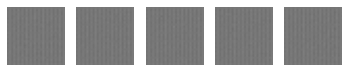

epoch: 1 / 10 ; G_loss: 3.9130054028370442 ; D_loss: 0.5962432913007347


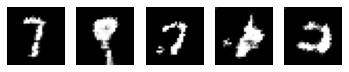

epoch: 2 / 10 ; G_loss: 2.2161867949697704 ; D_loss: 0.7618366056400486


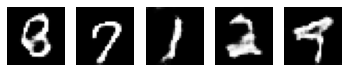

epoch: 3 / 10 ; G_loss: 1.9295844763007939 ; D_loss: 0.8579344408443341


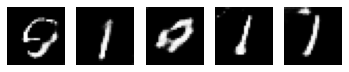

epoch: 4 / 10 ; G_loss: 1.8952469043752067 ; D_loss: 0.8869857232158


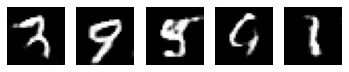

epoch: 5 / 10 ; G_loss: 1.86344740469741 ; D_loss: 0.8987097503123884


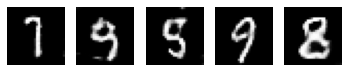

epoch: 6 / 10 ; G_loss: 1.820897370767899 ; D_loss: 0.911425160880909


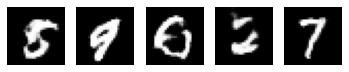

epoch: 7 / 10 ; G_loss: 1.74745802487382 ; D_loss: 0.9627298454905295


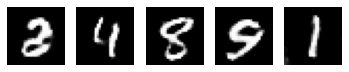

epoch: 8 / 10 ; G_loss: 1.7064861938532474 ; D_loss: 0.9838836147508616


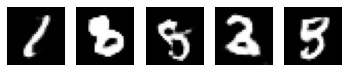

epoch: 9 / 10 ; G_loss: 1.7077873011684825 ; D_loss: 0.9461414105235002


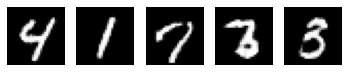

epoch: 10 / 10 ; G_loss: 1.686318936638343 ; D_loss: 0.966558873350931


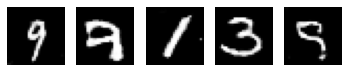

In [18]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt


class Generator(nn.Module):
    def __init__(self, noise_dim):
        super(Generator, self).__init__()
        self.convT1 = nn.ConvTranspose2d(noise_dim, 128, 4, 1, 0)
        self.convT2 = nn.ConvTranspose2d(128, 64, 3, 2, 1)
        self.convT3 = nn.ConvTranspose2d(64, 32, 4, 2, 1)
        self.convT4 = nn.ConvTranspose2d(32, 1, 4, 2, 1)

    def forward(self, input):
        x = F.relu(self.convT1(input))
        x = F.relu(self.convT2(x))
        x = F.relu(self.convT3(x))
        x = torch.tanh(self.convT4(x))
        return x

class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 4, 2, 1)
        self.conv2 = nn.Conv2d(32, 64, 4, 2, 1)
        self.conv3 = nn.Conv2d(64, 128, 3, 2, 1)
        self.conv4 = nn.Conv2d(128, 1, 4, 1, 0)

    def forward(self, input):
        x = F.leaky_relu(self.conv1(input), negative_slope=0.2)
        x = F.leaky_relu(self.conv2(x), negative_slope=0.2)
        x = F.leaky_relu(self.conv3(x), negative_slope=0.2)
        x = self.conv4(x)
        return x


if __name__ == '__main__':
    
    noise_dim = 100 # Size of z latent vector

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print('Using device:', device)

    dataset = torchvision.datasets.MNIST(
        root='./data', train=True, download=True, 
        transform=transforms.Compose([
            transforms.ToTensor(), transforms.Lambda(lambda x: ((x * 2) - 1))
        ])
    )    
    
    batch_size = 128
    dataloader = torch.utils.data.DataLoader(
        dataset, batch_size=batch_size, shuffle=True
    )
    
    netG = Generator(noise_dim).to(device)
    
    netD = Discriminator().to(device)
    
    noiseX = torch.randn(5, noise_dim, 1, 1, device=device)
    fake = netG(noiseX)
    fig, ax = plt.subplots(1, 5)
    for i in range(5):
      ax[i].imshow((fake[i].detach().cpu().reshape(28, 28) + 1) * 0.5, cmap='gray', vmin=0, vmax=1)
      ax[i].axis('off')
    plt.show()
    plt.close()

    
    # convention for real and fake labels
    # real_label = 1.0
    # fake_label = 0.0

    criterion = nn.BCEWithLogitsLoss()
    optimizerD = optim.Adam(netD.parameters(), lr=0.002, betas=(0.5, 0.999))
    optimizerG = optim.Adam(netG.parameters(), lr=0.001, betas=(0.5, 0.999))

    num_epochs = 10
    for epoch in range(num_epochs):
        ep_G_loss = 0
        ep_D_loss = 0
        for i, data in enumerate(dataloader, 0):
            realX = data[0].to(device)
            b_size = realX.size(0)

            # Update D: maximize log(D(x)) + log(1 - D(G(z)))
            ### Pass real data to netD
            netD.zero_grad()
            outD = netD(realX).view(-1)
            label = torch.full((b_size,), 1.0, device=device)
            errD_real = criterion(outD, label)
            errD_real.backward()            
            ### Pass fake data to netD
            noiseX = torch.randn(b_size, noise_dim, 1, 1, device=device)
            fake = netG(noiseX)
            output = netD(fake.detach()).view(-1)
            label.fill_(0.0)
            errD_fake = criterion(output, label)
            errD_fake.backward()            
            # Update D
            optimizerD.step()            

            # Update G: maximize log(D(G(z)))
            netG.zero_grad()
            output = netD(fake).view(-1)
            label.fill_(1.0)
            errG = criterion(output, label)
            errG.backward()
            # Update G
            optimizerG.step()
            
            ep_G_loss += errG.item()
            ep_D_loss += errD_real.item() + errD_fake.item()            
    
        print(
            'epoch:', epoch+1, '/', num_epochs,
            '; G_loss:', ep_G_loss / (dataset.data.shape[0] // batch_size),
            '; D_loss:', ep_D_loss / (dataset.data.shape[0] // batch_size)
        )

        if True:#epoch % 10 == 0 or (epoch+1) == num_epochs:
            noiseX = torch.randn(5, noise_dim, 1, 1, device=device)
            fake = netG(noiseX)
            fig, ax = plt.subplots(1, 5)
            for i in range(5):
              ax[i].imshow((fake[i].detach().cpu().reshape(28, 28) + 1) * 0.5, cmap='gray', vmin=0, vmax=1)
              ax[i].axis('off')
            plt.show()
            plt.close()
    

<br>

<hr>

<br>

<h2> Conditional GANs </h2>

<img src="cgan-networks.png" width=500></img>

\*Image Source: Mirza M., Osindero S., <b>Conditional Generative Adversarial Networks</b>, <i>https://arxiv.org/abs/1411.1784</i>.

<br>

In [40]:
n_classes = 10
dim = 10

embed = nn.Embedding(num_embeddings=n_classes, embedding_dim=dim)


In [41]:
print(embed(torch.tensor(0)))
print(embed(torch.tensor(1)))
print(embed(torch.tensor(2)))
print(embed(torch.tensor(3)))
print(embed(torch.tensor(4)))
print(embed(torch.tensor(5)))
print(embed(torch.tensor(6)))
print(embed(torch.tensor(7)))
print(embed(torch.tensor(8)))
print(embed(torch.tensor(9)))


tensor([-0.8346,  0.4271,  1.5886, -1.1823, -0.6711, -0.1870, -0.4501, -0.0468,
         0.5873,  0.2011], grad_fn=<EmbeddingBackward0>)
tensor([ 1.8068,  0.3488, -0.5196, -0.6485, -1.9116, -0.5220,  0.6998, -0.3342,
         0.2249,  0.0734], grad_fn=<EmbeddingBackward0>)
tensor([-0.3587,  1.9613, -0.3718, -0.4457,  1.3169,  1.8674, -0.0116,  0.9764,
         0.9125, -2.9187], grad_fn=<EmbeddingBackward0>)
tensor([ 0.7573,  0.6771, -0.3143,  0.3245, -0.2711, -0.3773,  1.0367,  0.5618,
         1.8021, -0.7686], grad_fn=<EmbeddingBackward0>)
tensor([ 0.3137, -0.6725,  1.6242, -0.0446, -1.1451,  0.8668, -0.4264, -0.9589,
        -1.8685, -0.3921], grad_fn=<EmbeddingBackward0>)
tensor([ 2.4468, -0.1966,  0.0054, -1.8549,  0.4312,  0.8302,  0.7804, -0.0309,
        -0.2751,  0.3476], grad_fn=<EmbeddingBackward0>)
tensor([ 0.8700, -0.5380, -0.4780, -0.5344,  1.5003,  0.9092, -1.4721,  0.5419,
         0.3269, -2.1420], grad_fn=<EmbeddingBackward0>)
tensor([ 1.0587,  0.7066,  0.7116, -0.835

In [38]:
print(embed(torch.tensor(10)))

IndexError: index out of range in self

Using device: cuda


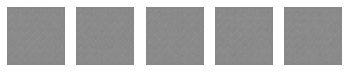

epoch: 1 / 10 ; G_loss: 4.013075668715004 ; D_loss: 0.6000513795964842


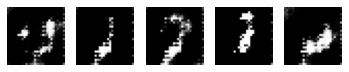

epoch: 2 / 10 ; G_loss: 2.83966650106968 ; D_loss: 0.6898628821612424


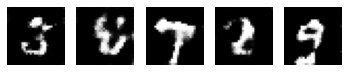

epoch: 3 / 10 ; G_loss: 2.1716929839717016 ; D_loss: 0.8339602939115885


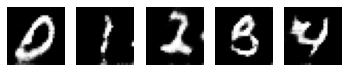

epoch: 4 / 10 ; G_loss: 1.8749174340667887 ; D_loss: 0.9285603308588521


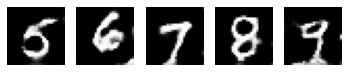

epoch: 5 / 10 ; G_loss: 1.646080933065496 ; D_loss: 1.0109043914156082


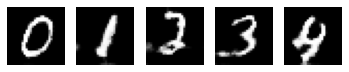

epoch: 6 / 10 ; G_loss: 1.4809479260037088 ; D_loss: 1.068651151517008


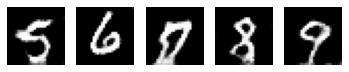

epoch: 7 / 10 ; G_loss: 1.4042757749557495 ; D_loss: 1.098764637660267


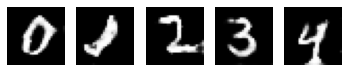

epoch: 8 / 10 ; G_loss: 1.3643667297994988 ; D_loss: 1.1247722446663766


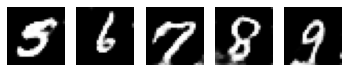

epoch: 9 / 10 ; G_loss: 1.342403773059193 ; D_loss: 1.1267511545338182


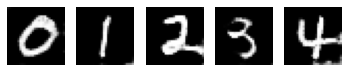

epoch: 10 / 10 ; G_loss: 1.3650376595493057 ; D_loss: 1.1311117726513462


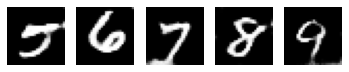

In [33]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt


class Generator(nn.Module):
    def __init__(self, noise_dim, n_classes):
        super(Generator, self).__init__()
        self.embed1 = nn.Embedding(num_embeddings=n_classes, embedding_dim=n_classes)
        self.convT1 = nn.ConvTranspose2d(noise_dim+n_classes, 128, 4, 1, 0)
        self.convT2 = nn.ConvTranspose2d(128, 64, 3, 2, 1)
        self.convT3 = nn.ConvTranspose2d(64, 32, 4, 2, 1)
        self.convT4 = nn.ConvTranspose2d(32, 1, 4, 2, 1)

    def forward(self, input, y):
        x = torch.cat((input, self.embed1(y).unsqueeze(-1).unsqueeze(-1)), -3)
        #print(x.shape)
        x = F.relu(self.convT1(x))
        x = F.relu(self.convT2(x))
        x = F.relu(self.convT3(x))
        x = torch.tanh(self.convT4(x))
        return x


class Discriminator(nn.Module):
    def __init__(self, n_classes):
        super(Discriminator, self).__init__()
        self.conv1_1 = nn.Conv2d(1, 32, 4, 2, 1)
        self.conv1_2 = nn.Conv2d(n_classes, 32, 4, 2, 1)
        self.conv2 = nn.Conv2d(64, 128, 3, 2, 1)
        self.conv3 = nn.Conv2d(128, 256, 3, 2, 1)
        self.conv4 = nn.Conv2d(256, 1, 3, 2, 0)

    def forward(self, input, labels):
        x1 = F.leaky_relu(self.conv1_1(input), negative_slope=0.2)
        x2 = F.leaky_relu(self.conv1_2(labels), negative_slope=0.2)
        x = torch.cat((x1, x2), -3)
        x = F.leaky_relu(self.conv2(x), negative_slope=0.2)
        x = F.leaky_relu(self.conv3(x), negative_slope=0.2)
        x = self.conv4(x)
        return x


if __name__ == '__main__':
    
    batch_size = 256
    noise_dim = 100 # Size of z latent vector
    num_epochs = 10
    n_classes = 10

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print('Using device:', device)

    dataset = torchvision.datasets.MNIST(
        root='./data', train=True, download=True, 
        transform=transforms.Compose([
            transforms.ToTensor(), transforms.Lambda(lambda x: ((x * 2) - 1))
        ])
    )    
    
    dataloader = torch.utils.data.DataLoader(
        dataset, batch_size=batch_size, shuffle=True
    )
    
    netG = Generator(noise_dim, n_classes).to(device)
    
    netD = Discriminator(n_classes).to(device)
    
    noiseX = torch.randn(5, noise_dim, 1, 1, device=device)
    G_inp_labels = torch.tensor([0,1,2,3,4]).to(device)
    fake = netG(noiseX, G_inp_labels)
    fig, ax = plt.subplots(1, 5)
    for i in range(5):
      ax[i].imshow((fake[i].detach().cpu().reshape(28, 28) + 1) * 0.5, cmap='gray', vmin=0, vmax=1)
      ax[i].axis('off')
    plt.show()
    plt.close()

    # convention for real and fake labels
    # real_label = 1
    # fake_label = 0

    criterion = nn.BCEWithLogitsLoss()
    optimizerD = optim.Adam(netD.parameters(), lr=0.002, betas=(0.5, 0.999))
    optimizerG = optim.Adam(netG.parameters(), lr=0.001, betas=(0.5, 0.999))

    for epoch in range(num_epochs):
        ep_G_loss = 0
        ep_D_loss = 0
        for i, data in enumerate(dataloader, 0):
            realX = data[0].to(device)
            b_size = realX.size(0)
            # images: 1 x 28 x 28
            # labels: 10 x 28 x 28
            # input: 11 x 28 x 28
            D_ip_label = torch.zeros((b_size, n_classes, realX.size(-2), realX.size(-1)))
            for i2 in range(b_size):
                D_ip_label[i2, data[1][i2],:,:] = 1
            D_ip_label = D_ip_label.to(device)
            G_ip_label = data[1].to(device)            

            # Update D: maximize log(D(x)) + log(1 - D(G(z)))
            ### Pass real data to netD
            netD.zero_grad()
            outD = netD(realX, D_ip_label).view(-1)
            label = torch.full((b_size,), 1.0, device=device)
            errD_real = criterion(outD, label)
            errD_real.backward()            
            ### Pass fake data to netD
            noiseX = torch.randn(b_size, noise_dim, 1, 1, device=device)
            fake = netG(noiseX, G_ip_label)
            output = netD(fake.detach(), D_ip_label).view(-1)
            label.fill_(0.0)
            errD_fake = criterion(output, label)
            errD_fake.backward()            
            # Update D
            optimizerD.step()            

            # Update G: maximize log(D(G(z)))
            netG.zero_grad()
            output = netD(fake, D_ip_label).view(-1)
            label.fill_(1.0)
            errG = criterion(output, label)
            errG.backward()
            # Update G
            optimizerG.step()
            
            ep_G_loss += errG.item()
            ep_D_loss += errD_real.item() + errD_fake.item()
            

            
        
        print(
            'epoch:', epoch+1, '/', num_epochs,
            '; G_loss:', ep_G_loss / (dataset.data.shape[0] // batch_size),
            '; D_loss:', ep_D_loss / (dataset.data.shape[0] // batch_size)
        )

        if True:#epoch % 10 == 0 or (epoch+1) % num_epochs == 0:
            noiseX = torch.randn(5, noise_dim, 1, 1, device=device)
            if epoch % 2 == 0:
                G_inp_labels = torch.tensor([0,1,2,3,4]).to(device)
            else:
                G_inp_labels = torch.tensor([5,6,7,8,9]).to(device)
            fake = netG(noiseX, G_inp_labels)
            fig, ax = plt.subplots(1, 5)
            for i in range(5):
              ax[i].imshow((fake[i].detach().cpu().reshape(28, 28) + 1) * 0.5, cmap='gray', vmin=0, vmax=1)
              ax[i].axis('off')
            plt.show()
            plt.close()
        
    

<br>

<hr>

<br>

<h2> RECAP: </h2>

<h3> 1. Training a Deep Convolutional Generative Adversarial Network (DCGAN) </h3> 

<h3> 2. Training a Conditional DCGAN </h3> 

<br>

<hr>

<br>

<h2> What to try our next: </h2>

<h3> 1. Try out generating colour images! </h3>

<h3> CelebA Dataset: <a src="https://mmlab.ie.cuhk.edu.hk/projects/CelebA.html">https://mmlab.ie.cuhk.edu.hk/projects/CelebA.html</a> </h3>

<h3> 2. CycleGAN, pix2pix, StyleGAN </h3>

<img src="cyclegan1.png" width=400> </img>

<img src="cyclegan2.png" width=400> </img>

*Image Sources: Zhu J-Y, Park T., Isola P., Efros A. A., <b>Unpaired Image-to-Image Translation using Cycle-Consistent Adversarial Networks</b>, <i>https://arxiv.org/abs/1703.10593</i>

<br>

<h3> Other References: </h3>
    
<p> 1. Github 'Curated list of awesome GAN applications and demonstrations': <a src="https://github.com/nashory/gans-awesome-applications">https://github.com/nashory/gans-awesome-applications</a> </p>

<p> 2. Also, <a src="https://github.com/nightrome/really-awesome-gan">https://github.com/nightrome/really-awesome-gan</a></p>
    
<p> 3. Github PyTorch implementations of several GANs: <a src="https://github.com/eriklindernoren/PyTorch-GAN">https://github.com/eriklindernoren/PyTorch-GAN</a> </p>    
    
<p> 4. GAN Zoo: <a src="https://github.com/hindupuravinash/the-gan-zoo">https://github.com/hindupuravinash/the-gan-zoo</a> </p>

<p> 5. Paperwithcode GANs: <a src="https://paperswithcode.com/search?q=GANs">https://paperswithcode.com/search?q=GANs></a>

<p> 6. Yi X., Walia E., Babyn P., <b>Generative Adversarial Network in Medical Imaging: A Review</b>, <a src="https://arxiv.org/abs/1809.07294">https://arxiv.org/abs/1809.07294</a>. </p>

<p> 7. Tajbakhsh N., Jeyaseelan L., Li Q., J. N., Wu Z., Ding X. <b>Embracing imperfect datasets: A review of deep learning solutions for medical image segmentation</b>, <i>Medical Image Analysis</i>, <a src="https://doi.org/10.1016/j.media.2020.101693">https://doi.org/10.1016/j.media.2020.101693</a>. </p>

<br>
